In [6]:
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import os

In [10]:
# Choose parameters to load the model
devID = 1
experiment = "length_independence"
dataset = "imdb"

if dataset == "imdb":
    T_values = range(100,1501,100)      # Sequence lengths
    s_A_values = [0.0]                  # Stability margins
    N = 4                               # Number of states per channel
    d = 16                              # Number of channels
    m = 25000                           # Number of samples
    m_test = 25000                      # Number of test samples
    ep = 30                             # Number of epochs
    bs = 256                            # Batch size
    lr = 1e-2                           # Learning rate
    wd = 1e-5                           # Weight decay
    delta = True                        # Use input dependent delta
elif dataset == "majority":
    T_values = range(25,401,25)         # Sequence lengths
    s_A_values = [0.0]                  # Stability margins
    N = 4                               # Number of states per channel
    d = 4                              # Number of channels
    m = 1000                            # Number of samples
    m_test = 1000                       # Number of test samples
    ep = 40                             # Number of epochs
    bs = 64                             # Batch size
    lr = 1e-2                           # Learning rate
    wd = 1e-5                           # Weight decay
    delta = True                        # Use input dependent delta
elif dataset == "listops":
    T_values = range(100,1001,100)         # Sequence lengths
    s_A_values = [0.0]                  # Stability margins
    N = 4                               # Number of states per channel
    d = 16                              # Number of channels
    m = 1000                            # Number of samples
    m_test = 1000                       # Number of test samples
    ep = 50                             # Number of epochs
    bs = 64                             # Batch size
    lr = 1e-2                           # Learning rate
    wd = 1e-5                           # Weight decay
    delta = True                        # Use input dependent delta
    T_var = 5                           # Variance of the sequence length
else:
    raise ValueError("Invalid dataset")

# Set the seed
np.random.seed(0)
random.seed(0)

# Read all models from the models directory
repo_dir = "." # assuming you are in the repository root
folder_path = f"{repo_dir}/results/{experiment}/{dataset}/significance"

s_A = 0.0
runs = [1, 2, 3]
train_all = None
test_all = None
seq_len = None

for run in runs:
    file_name = f"sig_sA_{s_A}_N_{N}_d_{d}_m_{m}_ep_{ep}_bs_{bs}_lr_{lr}_wd_{wd}_delta_{delta}_run_{run}"
    file_path = os.path.join(folder_path, file_name + ".csv")

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}, skipping.")
        continue

    if seq_len is None:
        seq_len = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=0)

    train_row = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=1).reshape(1, -1)
    test_row = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=2).reshape(1, -1)

    if train_all is None:
        train_all = train_row
        test_all = test_row
    else:
        train_all = np.vstack([train_all, train_row])
        test_all = np.vstack([test_all, test_row])



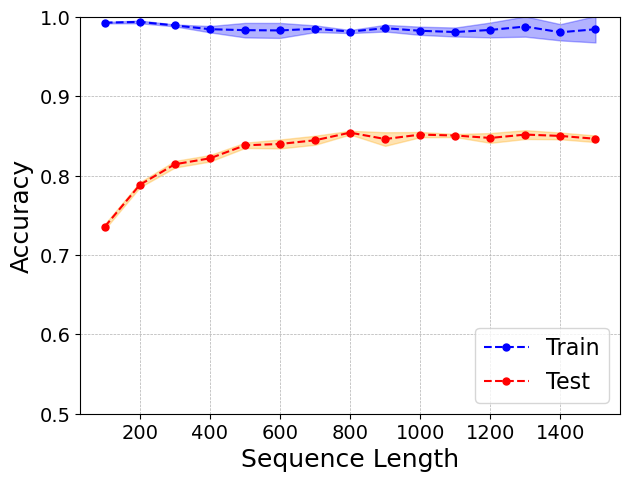

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# seq_len: array of sequence lengths
# train_all: shape (num_seeds, num_lengths)

train_mean = np.mean(train_all, axis=0)
train_std = np.std(train_all, axis=0, ddof=1)

plt.plot(seq_len, train_mean, marker='.', linestyle='--', markersize=10, linewidth=1.5, color='blue', label='Train')
plt.fill_between(seq_len, train_mean - train_std, train_mean + train_std,
                 alpha=0.3, color="blue")

# Same for test
test_mean = np.mean(test_all, axis=0)
test_std = np.std(test_all, axis=0, ddof=1)

plt.plot(seq_len, test_mean, marker='.', linestyle='--', markersize=10, linewidth=1.5, color='red', label='Test')
plt.fill_between(seq_len, test_mean - test_std, test_mean + test_std,
                 alpha=0.3, color="orange")

plt.xlabel("Sequence Length", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(f'{dataset.capitalize()} Dataset')
plt.ylim(bottom = 0.5, top=1)
plt.margins(0.05)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=16)
# plt.show()
path = f"train_test_sA_{s_A}_N_{N}_d_{d}_m_{m}_ep_{ep}_bs_{bs}_lr_{lr}_wd_{wd}_delta_{delta}.pdf"
plt.savefig(f'results/{experiment}/{dataset}/' + path, bbox_inches='tight', dpi=300)



In [13]:
print(train_mean)
print(train_std)
print(test_mean)
print(test_std)
print(train_mean - test_mean)

[0.99288    0.99384    0.98936    0.98462667 0.98341333 0.98306667
 0.98518667 0.98165333 0.98589333 0.98262667 0.98105333 0.98369333
 0.98797333 0.98074667 0.98456   ]
[0.00084664 0.00167619 0.00117847 0.00397881 0.0091568  0.00944723
 0.00424383 0.00190886 0.00421603 0.00517229 0.00564756 0.00933007
 0.01277525 0.01024542 0.01663986]
[0.73572    0.78853333 0.81444    0.82189333 0.83829333 0.83998667
 0.84465333 0.85425333 0.84618667 0.85178667 0.85062667 0.84756
 0.8518     0.85012    0.84652   ]
[0.00322068 0.00323316 0.00416384 0.00408007 0.00334194 0.00561731
 0.00570324 0.00233934 0.00858001 0.00330583 0.00192845 0.00617129
 0.00557896 0.00422014 0.00418014]
[0.25716    0.20530667 0.17492    0.16273333 0.14512    0.14308
 0.14053333 0.1274     0.13970667 0.13084    0.13042667 0.13613333
 0.13617333 0.13062667 0.13804   ]
